In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_school = pd.read_csv("Most-Recent-Cohorts-Institution.csv", low_memory = False)

# Q1: A basic structural description of the dataset (10%):

- __How many schools and variables?__

In [3]:
print('Total Number of schools in the dataset are {}'.format(len(df_school['UNITID'].unique())))
print(f'Total Number of variables in the datatset are {len(df_school.columns)}')

Total Number of schools in the dataset are 6543
Total Number of variables in the datatset are 3214


- __How many schools are there per state?__

Followig print code shows the number of schools in each state. __CA__ has the hieghest number of schools (__702__) and 5 states (__PW,MH,FM,AS,MP__) have only 1 school per state.

In [4]:
df_state_count = df_school.groupby('STABBR')['UNITID'].count().reset_index()
df_state_count = df_state_count.rename(columns =
                                       {'UNITID': '# of schools'}).sort_values(
                                                                            by='# of schools',
                                                                            ascending=False
                                                                      ).reset_index(
                                                                                    drop = True
                                                                                    )

# Top 10 states with highest number of universities
df_state_count.head(10)

,STABBR,# of schools
0,CA,702
1,NY,438
2,TX,417
3,FL,395
4,PA,343
5,OH,290
6,IL,249
7,NC,174
8,MI,174
9,GA,170


In [5]:
for row in df_state_count.itertuples():
    print('{} has {} of schools'.format(row[1],row[2]))

CA has 702 of schools
NY has 438 of schools
TX has 417 of schools
FL has 395 of schools
PA has 343 of schools
OH has 290 of schools
IL has 249 of schools
NC has 174 of schools
MI has 174 of schools
GA has 170 of schools
VA has 162 of schools
NJ has 161 of schools
TN has 157 of schools
MO has 156 of schools
MA has 150 of schools
PR has 147 of schools
IN has 133 of schools
AZ has 118 of schools
LA has 118 of schools
MN has 111 of schools
WA has 107 of schools
OK has 100 of schools
SC has 94 of schools
WI has 93 of schools
CO has 92 of schools
AR has 90 of schools
KY has 86 of schools
MD has 83 of schools
AL has 83 of schools
CT has 79 of schools
KS has 77 of schools
IA has 77 of schools
OR has 77 of schools
WV has 70 of schools
UT has 65 of schools
MS has 54 of schools
NM has 44 of schools
NV has 40 of schools
NE has 39 of schools
ME has 37 of schools
ID has 37 of schools
NH has 34 of schools
MT has 31 of schools
SD has 27 of schools
ND has 27 of schools
DC has 24 of schools
HI has 23 of

- __How are schools-per-state distributed? Compute a state-level variable '# of schools', and describe its distribution numerically and visually__.

Following cells describe the number of schools distributed both numerically as well graphically. 
 - The average number of schools per state is approximately 110.90
 - The median value of 79 suggests that half of the states have 79 or fewer schools. 
 - 75% of the states have 148.5 or fewer schools.
 - The maximum value of 702 indicates that the state with the most schools in the dataset has 702 schools

In [6]:
df_state_count['# of schools'].describe()

count     59.000000
mean     110.898305
std      129.445594
min        1.000000
25%       27.000000
50%       79.000000
75%      148.500000
max      702.000000
Name: # of schools, dtype: float64

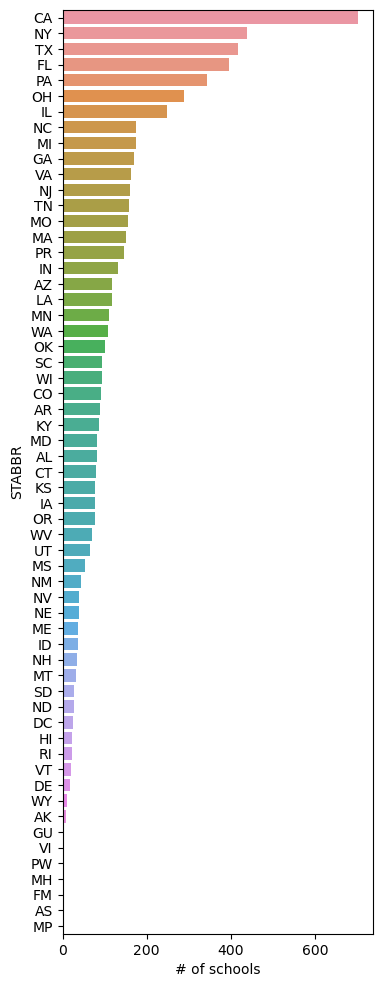

In [7]:
fig, ax = plt.subplots(figsize=(4, 12))
 
# drawing the plot
sns.barplot(data=df_state_count, x="# of schools", y="STABBR", ax = ax);
plt.show()

# Q2: The distribution of the overall completion rate(15%):

- **Provide choice of completion rate variable with a justification for that choice**

I am choosing `C150_4` for Bachelor's Degree offering universities as students may decide to take a break for a shorter period of time because of financial hardships, gaining job experinces, or serving armed forces for shorter period of time. Therefore, taking this variable would mean students will complete in upto 6 years for bachelor degree which seems reasonable.

- **Describe the distribution of that variable numerically and visually.**

In [8]:
df_bachelor = df_school[df_school['HIGHDEG']==3].copy()
df_bachelor_missing = df_bachelor[df_bachelor['C150_4'].isna()]
missing_pct = len(df_bachelor_missing)*100/len(df_bachelor)
print(f'Number of missing values {len(df_bachelor_missing)}')
print("% of missing 'C150_4' values for bachelor degree offering schools is {}".format(missing_pct))

Number of missing values 51
% of missing 'C150_4' values for bachelor degree offering schools is 7.306590257879656


*There are ~7.4% completion rate values are missing for Bachelor degree offering schools. Now, I will check if among all these missing values, which institutes are predominantly bachelor degree offering and will fill these missing value.*

In [9]:
missing_value_index = df_bachelor_missing[(df_bachelor_missing['PREDDEG'] != 0) 
                                          & (df_bachelor_missing['PREDDEG'] != 3)].index
df_bachelor.drop(missing_value_index, inplace = True)

#fill the remaining missing values by median
df_bachelor['C150_4'].fillna(df_bachelor['C150_4'].median(), inplace=True)
print(f"Remaining missing values are {df_bachelor['C150_4'].isna().sum()}")

Remaining missing values are 0


In [10]:
df_bachelor['C150_4'].describe()

count    680.000000
mean       0.462826
std        0.240372
min        0.000000
25%        0.286275
50%        0.437500
75%        0.637175
max        1.000000
Name: C150_4, dtype: float64

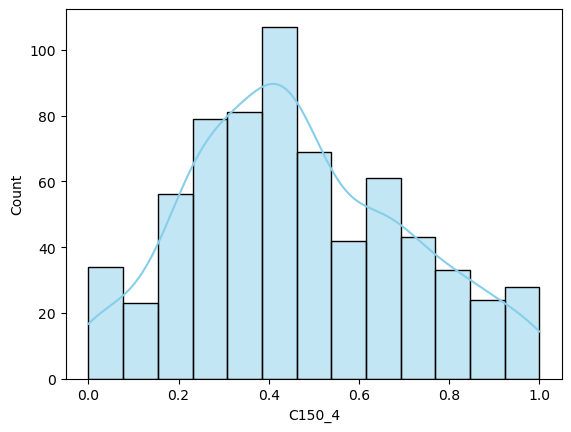

In [11]:
sns.histplot(data=df_bachelor, x='C150_4',kde=True, color='skyblue', edgecolor='black');
plt.show()

- **What is the mean? Is the distribution skewed?**

*The mean of `C150_4` variable is 46.28% and meadian is 43.75%. Therefore, the distribution is right skewed*

# Q3: The distribution of the admission rate, both numerically and graphically (15%). After describing the distribution of the continuous admission rate, compute the admissions category (open, low-selectivity, or high-selectivity). Do notnot hard-code the median — compute the median, and use the computed value (stored in a Python variable) to bucketize the admission rates. Show the distribution of admissions category (how many schools are in each category?).

- **Provide choice of completion rate variable with a justification for that choice**

I have chosen `ADM_RATE` because we have data at the institution level, and the `ADM_RATE` data is also institution-wise.

Steps taken to fill `ADM_RATE` missing value
1. Combined values of `ADM_RATE` and `ADM_RATE_ALL`. I have taken `ADM_RATE` as my first prefrence and `ADM_RATE_ALL` as second prefrence.
    - I choose `ADM_RATE_ALL` as second option to fill missing values as this represent the admission rate across all branches so, this can be a good indicator for such missing values

2. I use `OPENADMP` to filter out schools who have open admission policy and I assumed they have 100% admission rate as these insitutes have bare mininmum acceptence criteria and would accept any application meeting such criteria.

In [12]:
df_admission_rate = df_school.copy()
first_quartile = df_admission_rate['ADM_RATE'].describe()['25%']
third_quartile = df_admission_rate['ADM_RATE'].describe()['75%']
df_admission_rate['ADM_RATE'].describe()

count    1957.000000
mean        0.731713
std         0.220946
min         0.000000
25%         0.619800
50%         0.780100
75%         0.901000
max         1.000000
Name: ADM_RATE, dtype: float64

- **I have used following method to categorize each university**

    Rather than using median as the indicator for categorizing, I am using quartile ranging.

    - `ADM_RATE` $\leq$ 1st Quartile ---> 'High Selectivity'
    - 1st Quartile $<$ `ADM_RATE` $\leq$ 3rd Quartile --> 'Low Selectivity'
    - `ADM_RATE`$>$ 3rd Quartile --> 'Open'
  

In [13]:
print('Missing values before combine {}'.format(df_admission_rate['ADM_RATE'].isna().sum()))
df_admission_rate['ADM_RATE'] = df_admission_rate['ADM_RATE'].combine_first(df_admission_rate['ADM_RATE_ALL'])
print('Missing values after combine {}'.format(df_admission_rate['ADM_RATE'].isna().sum()))

Missing values before combine 4586
Missing values after combine 4319


In [14]:
mask_open_adm = df_admission_rate['OPENADMP'] == 1

df_open_adm_policy = df_admission_rate[mask_open_adm]
mask_fill_missing_adm_index = df_open_adm_policy[df_open_adm_policy['ADM_RATE'].isna()].index


df_admission_rate.loc[mask_fill_missing_adm_index, 'ADM_RATE'] = 1

df_admission_rate['ADM_RATE'].fillna(df_admission_rate['ADM_RATE'].median(), inplace=True)

In [15]:
df_admission_rate['ADM_RATE'].describe()

count    6543.000000
mean        0.908669
std         0.183812
min         0.000000
25%         0.899450
50%         1.000000
75%         1.000000
max         1.000000
Name: ADM_RATE, dtype: float64

In [16]:
def add_category(adm_rate, first = first_quartile, third = third_quartile):
    if adm_rate <= first:
        return 'High Selectivity'
    elif first < adm_rate <= third:
        return 'Low Selectivity'
    else:
        return 'Open'
        

df_admission_rate['ADM_CATEGORY'] = df_admission_rate['ADM_RATE'].apply(add_category)

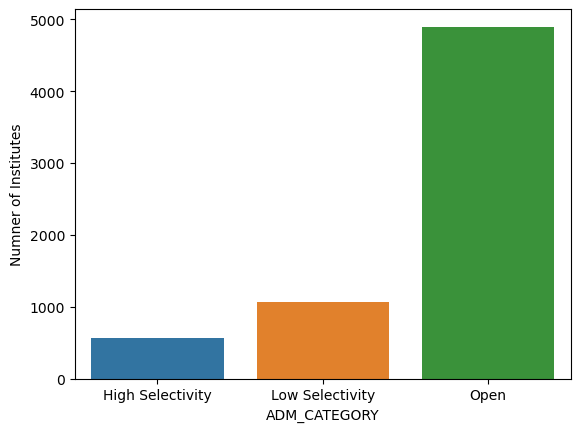

In [17]:
sns.countplot(data=df_admission_rate, x="ADM_CATEGORY", order =['High Selectivity', 'Low Selectivity', 'Open']);
plt.ylabel('Numner of Institutes')
plt.show()

# Q4:  The break down (sometimes called a {term} disaggregation ) of completion rate by race, by the school characteristics described in “Question”, and by one  additional school characteristic you select (30%). Give a justification for your choice of additional characteristic — why do you think it might be interesting?

In [18]:
student_race_vars = {'C150_4_WHITE' : 'White',
                    'C150_4_BLACK' : 'Black',
                    'C150_4_HISP' : 'Hispanic',
                    'C150_4_ASIAN' : 'Asian',
                    'C150_4_AIAN' : 'American Indian',
                    'C150_4_NHPI' : 'Native Hawaiian',
                    'C150_4_2MOR' : 'Two or More',
                    'C150_4_NRA' : 'Resident Alien',
                    'C150_4_UNKN' : 'Race Unknown'
        }

# Let's fill in the missing values as I did in the `C150_4` variable with the median values
for key in student_race_vars:
    df_bachelor[key].fillna(df_bachelor[key].median(), inplace=True)

- **Student Race**

Below I have plotted the completion rate for each of the student race

In [19]:
df_bachelor[list(student_race_vars.keys())].describe()

,C150_4_WHITE,C150_4_BLACK,C150_4_HISP,C150_4_ASIAN,C150_4_AIAN,C150_4_NHPI,C150_4_2MOR,C150_4_NRA,C150_4_UNKN
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,0.488239,0.336730,0.440034,0.524484,0.329565,0.237829,0.415512,0.509665,0.457212
std,0.245007,0.235353,0.245583,0.271152,0.257237,0.238958,0.246505,0.235494,0.240923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333300,0.205900,0.297325,0.461850,0.292700,0.183350,0.329525,0.500000,0.393700
50%,0.479150,0.291800,0.411800,0.512550,0.292700,0.183350,0.381000,0.500000,0.441900
75%,0.643200,0.401975,0.581875,0.654675,0.292700,0.183350,0.500000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


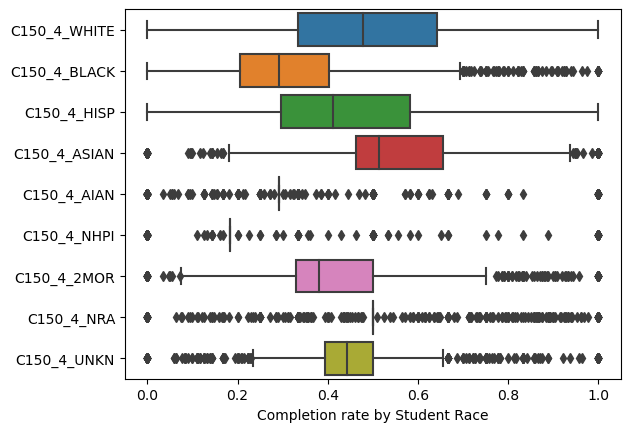

In [20]:
sns.boxplot(data = df_bachelor[list(student_race_vars.keys())], orient="h");
plt.xlabel('Completion rate by Student Race')
plt.show()

- **Completion Rate by Admission Category**

Below I have plotted the completion rate for each of the category based on Admission rate

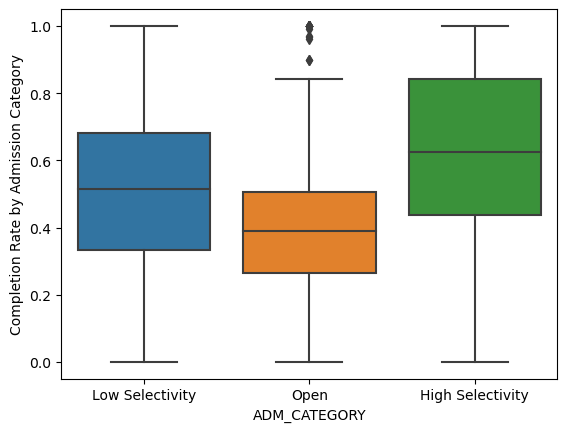

In [21]:
mask_open_adm = df_bachelor['OPENADMP'] == 1

df_open_adm_policy = df_bachelor[mask_open_adm]
mask_fill_missing_adm_index = df_open_adm_policy[df_open_adm_policy['ADM_RATE'].isna()].index


df_bachelor.loc[mask_fill_missing_adm_index, 'ADM_RATE'] = 1

df_bachelor['ADM_RATE'].fillna(df_admission_rate['ADM_RATE'].median(), inplace=True)

df_bachelor['ADM_CATEGORY'] = df_bachelor['ADM_RATE'].apply(add_category)

sns.boxplot(x='ADM_CATEGORY', y='C150_4', data=df_bachelor);
plt.ylabel('Completion Rate by Admission Category')
plt.show()

- **Completion Rate by School Type**

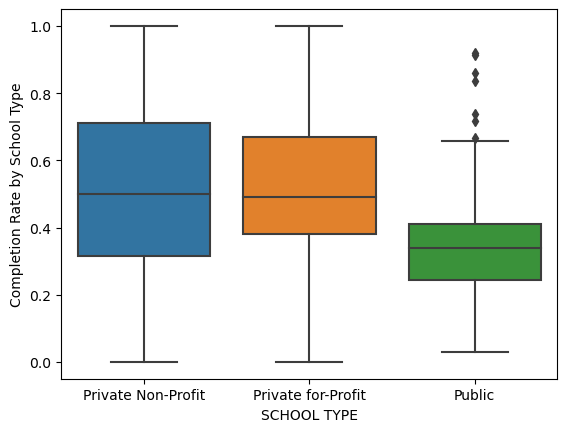

In [22]:
df_bachelor['SCHOOL TYPE'] = df_bachelor['CONTROL']
control_dict = {1: 'Public',
                2: 'Private Non-Profit',
                3: 'Private for-Profit'
               }
df_bachelor['SCHOOL TYPE'] = df_bachelor['SCHOOL TYPE'].map(control_dict)
sns.boxplot(x='SCHOOL TYPE', y='C150_4', data=df_bachelor);
plt.ylabel('Completion Rate by School Type')
plt.show()

- **Another School characterstic I choose to show the completion rate, is by whether school is a main campur or not main campus**

This characterstic I choose as to show the difference or find insights about the completion rate by school is a Main Campus or branch.

My insight from this characterstic is that **_Main_** campus tends to have higher completion rate compared to the **_Not Main_** campus

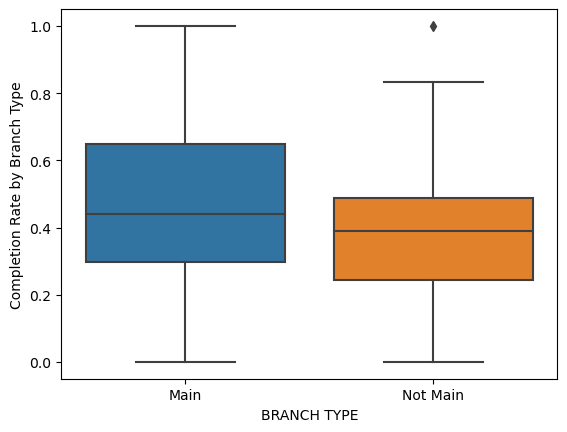

In [23]:
df_bachelor['BRANCH TYPE'] = df_bachelor['MAIN']
branch_dict = {0: 'Not Main',
                1: 'Main'
               }
df_bachelor['BRANCH TYPE'] = df_bachelor['BRANCH TYPE'].map(branch_dict)
sns.boxplot(x='BRANCH TYPE', y='C150_4', data=df_bachelor);
plt.ylabel('Completion Rate by Branch Type')
plt.show()

# Q5: The answers to 5 questions of your choice from sections 3.1, 3.2, and 3.3 of {reading} week2:datasheets , based on the documentation for the college scorecard data (20%). Questions should come from at least 2 different sections of the paper.

1. **For what purpose was the data set created?**
    
    The College Scorecard project is designed to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions are preparing their students to be successful.

    This dataset is created for the prospective students and their respective parents or guradians to make a wise decision while selecting a school. The data includes various factors such as which school has the highest acceptance rate or most selective. This dataset is also good for Schools/Collegs to make decisions is crucial in higher education. Colleges can look at this data to figure out how well they are doing and how they can improve by comparing to other schools

<br>

2. **Who created the dataset(e.g.,which team,research group)and on behalf of which entity (e.g., company, institution, organization)?**
    
    The dataset is created by US Department of Education and hosted on an online platform called '_College Scorecard_'. This project is funded by US Government for consumers to compare the cost and value of higher education institutions in the United States.
    
<br>


3. **How many instances are there in total(of each type,if appropriate)?**
    
    The dataset includes information about **6543** schools both including main and non main branches. The dataset has information about **2,072 Public**, **1967 Private Non-Profit**, and **2,504 Private for-Profit** schools.

<br>

4. **Are there recommended data splits(e.g., training, development/validation, testing)?**
    
    No, there is no recommended split in any of the technical documentation available on the website.
<br> 

5. **Is the dataset self-contained, or does it link to or other wise rely on external resources (e.g., websites, tweets, other datasets)?**

    This dataset is self contained available in a well structured format. To use this data, one needs to refer to data dictionary and the related technical document for context purpose only but not any other source for further data scrapping.

# Q6: Write 2 paragraphs reflecting on what you learned about this data, higher education, and data science through this assignment (10%)

This dataset have provide the information about colleges and universities in the United States. This data includes information about students, admissions,finances, and what happens to students after they graduate. Using data to make decisions is crucial in higher education. Colleges can look at this data to figure out how well they are doing and how they can improve. Prospective students and their families, they can use the data to pick the right college based on things like cost, what graduates earn, and who goes there.

When I started the assignment I was not sure how to read and collect the data from dataset. I read documentation couple of times before I understand how to read and anaylze the data. But before to make it useful, we need to clean it up and make it neat. This assignment emphasized the importance of data preprocessing and visualization in the data science workflow. Visualization techniques, such as creating bar charts or scatter plots, proved to be effective tools for summarizing complex information. Moreover, I saw that when we work with data, we need to be very careful and respectful. Some of the information in the dataset is private, so we must protect people's privacy and make sure we use the data for good things.


Also, doing this assignment, it reflected on me the duties of a data scientist before building any ML/AI models. It's important to understand the data, clean it well, and remove anomalies before making any decision based on trained models on the dataset